# **Data Visualization**


<hr>


Downloaded database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-05-05 23:27:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  45.5MB/s    in 0.8s    

2022-05-05 23:27:26 (45.5 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connected to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

In [3]:
import pandas as pd

In [4]:
QUERY = """
SELECT COUNT(*)
FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


Listing all tables

In [5]:
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


Respondent count by age

In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


Describing the table master

In [7]:
table_name = 'master'  
QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

## Visualizing distribution of data


### Histograms


Histogram of `ConvertedComp.`


<AxesSubplot:ylabel='Frequency'>

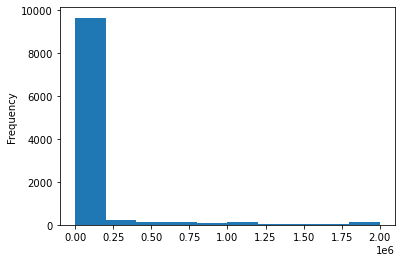

In [8]:
QUERY = """
SELECT *
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df['ConvertedComp'].plot.hist()

### Box Plots


Box plot of `Age.`


<AxesSubplot:>

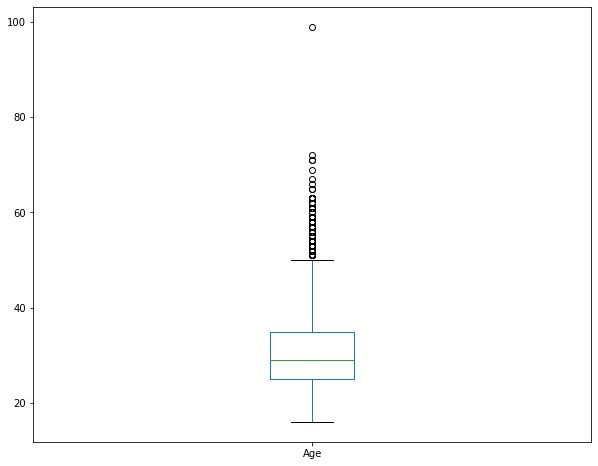

In [11]:
df['Age'].plot.box(figsize=(10,8))

## Visualizing relationships in data


### Scatter Plots


Scatter plot of 'Age' and 'WorkWeekHrs'. Here we can see these two variables are not correlated


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

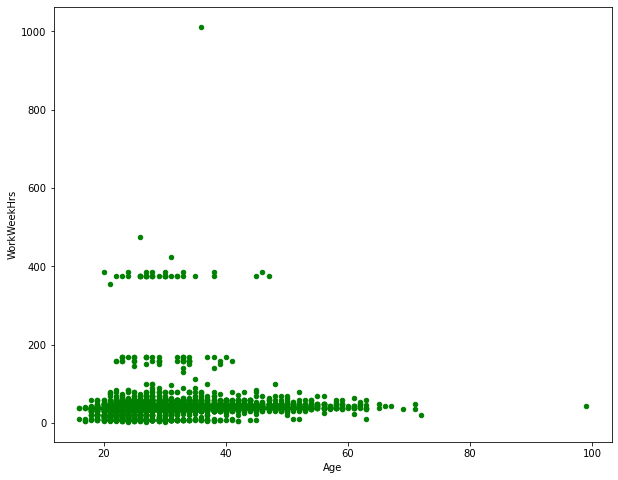

In [15]:
df.plot.scatter(x='Age',y='WorkWeekHrs',figsize=(10,8),color='green')


### Bubble Plots


Bubble plot of `WorkWeekHrs` and `CodeRevHrs`, with `Age` column as bubble size.


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

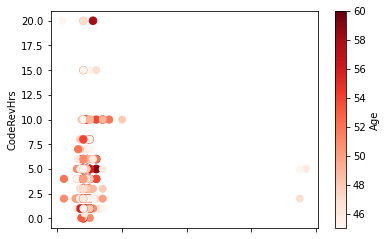

In [31]:
df.plot.scatter(x='WorkWeekHrs',y='CodeRevHrs',s='Age',c='Age',cmap='Reds')



## Visualizing composition of data


### Pie Charts


Pie chart of the top 5 databases that respondents wish to learn next year


<AxesSubplot:ylabel='DatabaseDesireNextYear'>

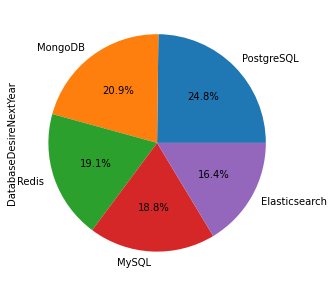

In [16]:
QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""
df2 = pd.read_sql_query(QUERY,conn)
df2['DatabaseDesireNextYear'].value_counts()[0:5].plot.pie(autopct='%1.1f%%',figsize=(5,5))



### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<AxesSubplot:title={'center':'Median Workweek Hrs and CodeRev Hrs'}, xlabel='Age', ylabel='Hours'>

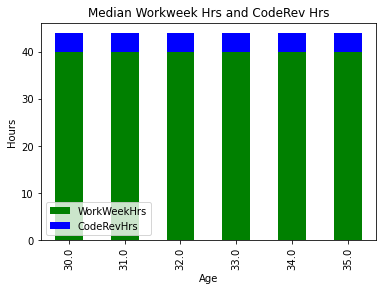

In [20]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
where Age between 30 and 35
"""
df2 = pd.read_sql_query(QUERY,conn)
df2.groupby('Age').median().plot.bar(stacked=True, xlabel='Age', ylabel = 'Hours', title='Median Workweek Hrs and CodeRev Hrs',color=['green','blue'])

## Visualizing comparison of data


### Line Chart


Plot of the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age', ylabel='Median Compensation'>

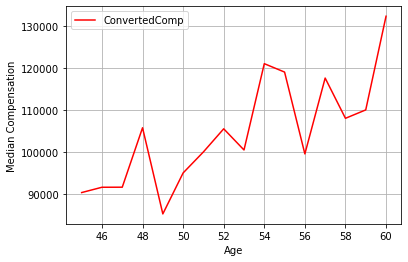

In [17]:
QUERY = """
SELECT *
FROM master
WHERE Age between 45 and 60
"""
df = pd.read_sql_query(QUERY,conn)
y = df.groupby('Age').median()
y.plot.line(y='ConvertedComp',xlabel='Age', ylabel='Median Compensation',grid=True,color='red')

In [16]:
conn.close()